<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson7/GB_NN_intro_hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?

Рассмотрим RefineDet. (https://arxiv.org/abs/1711.06897)

Лучшую точность детектирования объектов обеспечивают двухэтапные модели. Одноэтапные архитектуры менее точные, но приобретают в скорости работы. RefineDet - однократный детектор предполагает обеспечить более высокую точность, чем двухэтапные модели, при этом сохранить эффективность. 

RefineDet состоит из двух взаимосвязанных модулей, а именно модуля уточнения привязки и модуля обнаружения объектов.

В частности, первый направлен на (1) фильтрацию отрицательных привязок, чтобы уменьшить пространство поиска для классификатора, и (2) грубую настройку местоположения и размеров привязок, чтобы обеспечить лучшую инициализацию для последующего регрессора.

Второй модуль использует уточненные привязки в качестве входных данных из первого для дальнейшего улучшения регрессии и прогнозирования меток нескольких классов.

Подобно SSD, RefineDet создает фиксированное количество граничных рамок и оценок, указывающих на присутствие различных классов объектов в этих рамках, за которыми следует немаксимальное подавление (NMS) для получения окончательного результата.

Предварительно обученный ILSVRC CLS-LOC VGG-16 и ResNet-101 используются в качестве основы (backbone).

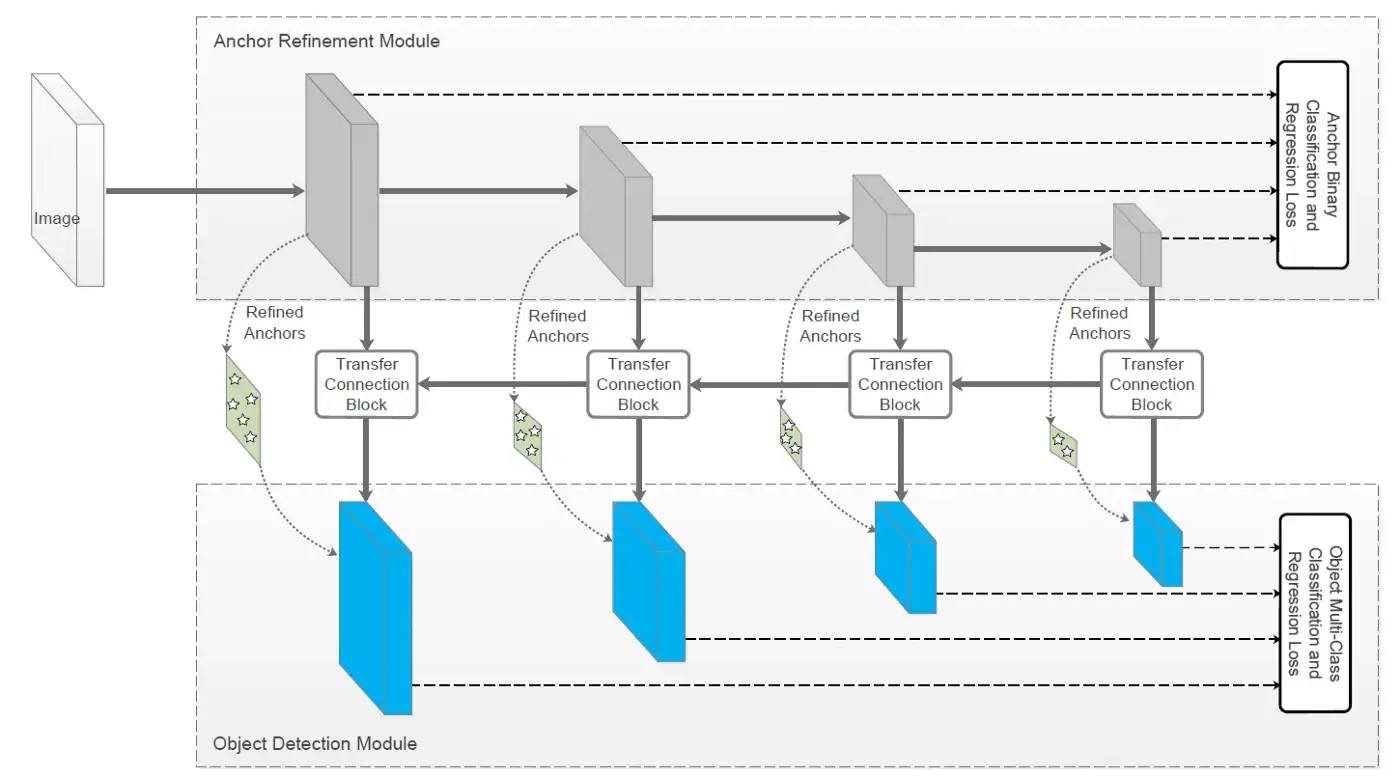

4 векторных слоя с общим размером шага 8, 16, 32 и 64 пикселя используются для обработки объектов разного масштаба.
Каждый векторный слой связан с одной конкретной шкалой привязок и 3 соотношениями сторон.

**Модуль уточнения привязки (ARM).**


В SSD есть предопределенные поля привязки с фиксированными местоположениями, соотношениями и размерами.

ARM стремится удалить отрицательные привязки, чтобы уменьшить пространство поиска для классификатора, а также грубо настроить расположение и размеры привязок, чтобы обеспечить лучшую инициализацию для последующего регрессора.

В частности, с каждой регулярно разделённой ячейкой на карте признаков (freature map) связаны n полей привязки.

В каждой ячейке карты объектов прогнозируются четыре смещения уточненных полей привязки.

Два показателя достоверности используются для указания на наличие объектов переднего плана в этих полях.


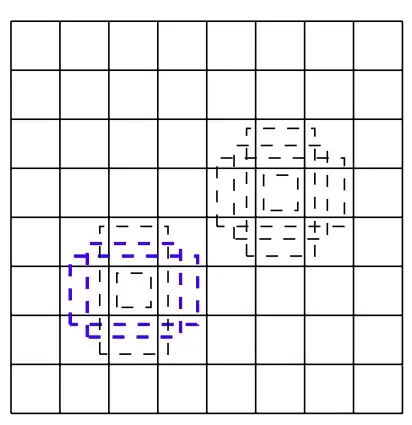

Предопределённые поля привязок в SSD.

Если отрицательная достоверность поля привязки больше заданного порога (т. е. эмпирически 0,99), поле привязки отбрасывается при обучении ODM. Совершенно точно, что это фон.
Таким образом, для обучения ODM передаются только уточненные блоки жесткой отрицательной привязки и уточненные блоки положительной привязки.

**Модуль обнаружения объектов (ODM)**


После получения уточненных полей привязки они передаются в соответствующие карты объектов в ODM.
ODM стремится регрессировать точное местоположение объектов и прогнозировать метки нескольких классов на основе уточненных привязок.

**Блок передачи информации (блок передачи связи TCB)**

TCB преобразует фичи из ARM в ODM.

TCB заключается в интеграции крупномасштабного представления путем добавления выскоуровневых фич к переданным фичам для повышения точности обнаружения.
Чтобы сопоставить размеры между ними, используется операция деконволюции для увеличения карт объектов высокого уровня и суммирования их поэлементно.

ARM сначала отфильтровывает привязки с регулярно расположенными плитками с отрицательными показателями достоверности, превышающими пороговое значение 0,99.
ODM берет на себя эти усовершенствованные привязки и выводит 400 самых надежных обнаружений на изображение.
Применяется NMS с перекрытием жаккарда 0,45 на класс.
Для получения окончательных результатов обнаружения сохраняются 200 наиболее достоверных обнаружений на изображение.